<a href="https://colab.research.google.com/github/quinn-dougherty/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/unit2_sprint2_CHALLENGE_ds1_quinndougherty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
X = df.drop('price', axis=1)
y = df.price

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [0]:
def LR(X, y, testsize=0.3): 
  #print(X.shape, y.shape)
  '''# X is a dataframe with arbitrary features
  # y is a dataframe with one feature
  # they are each sliced from the same master df. 
  '''
  # Split into test and train dataset
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=testsize, random_state=42)

  # fit model using train datasets
  model = LinearRegression()
  model.fit(X_train, Y_train)

  # Create new predictions using x_test
  y_pred = model.predict(X_test)

  # Measure Accuracy using y_test and y_pred
  RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
  R2 = r2_score(Y_test, y_pred)
  
  coefs_format = map(float, map(lambda x: '{:.3}'.format(x), model.coef_))
  
  return {'Predictions': y_pred, 'RMSE': RMSE, 'R2': R2, 'coefficients': list((coefs_format)), 'intercept': model.intercept_}

mod1 = LR(X,y)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [6]:
rs1 = f"Intercept: {mod1['intercept']:.3}\n\nCoefficients: {mod1['coefficients']}"

print(rs1)

Intercept: -2.26e+06

Coefficients: [-33.6, -1650.0, -39.2, 259.0, -1030.0, 4550.0, 1140.0, 8490.0]


## 1.5 Use the test data to make predictions

In [7]:
mod1['Predictions']

array([19097.32580858,  5482.08466941, 25931.42968492, ...,
         342.63477955, 13051.90174964, 13971.9197201 ])

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [8]:
rs2 = f"RMSE: {mod1['RMSE']:.3}\n\nCoefficient of Determination: {mod1['R2']:.3}"

print(rs2)

RMSE: 2.03e+04

Coefficient of Determination: 0.31


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

Since 'year' is one of the features I'm regressing on, it's like an `x` in a linear equation; the coefficient corresponding to year is it's _slope_. 

What year's slope tells you is **how strongly age effects price and in what direction**. A large absolute value of this coefficient means a car's age has a _huge_ effect on price. If the slope is positive, then we know that as years increment (taking steps closer to the current year) then the price will increase; if the slope is negative, then vice versa. 

## 1.8 How should we interpret the Root-Mean-Square Error?

1. low is good, high is bad. 
2. "good" means "the model is accurate"
3. _infinitessimally_ low is often a sign of overfitting, so make sure none of your other metrics look dubious. 
4. a negative number means a huge mistake--- _all substractions should get squared out_

## 1.9 How should we interpret the $R^2$?

1. $R^2$ is callled the **coefficient of determination**, it is a _proportion of variances_, comparing predictable variance of the dependent variable to variance of the independent variable
2. since it's bound in `[0,1]`, we can interpret it as a *percentage*
3. Saying that "the model gave me `R2 = x`" is spoken "**The model can explain `x%` of the variance**", meaning that x : 1 - x is your _signal-to-noise ratio_.
4. you can take the square root of it to get to Pearson's coefficient

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['ln_price'] = np.log(df.price)

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

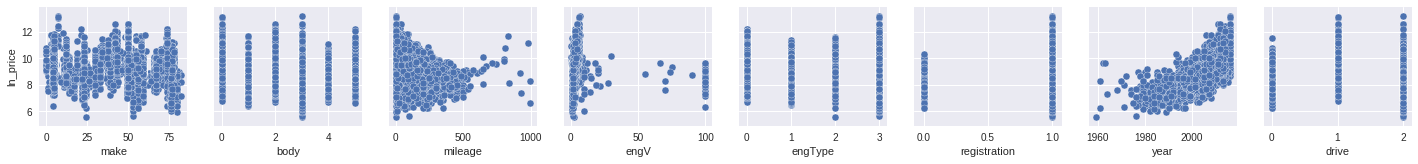

In [10]:
sns.pairplot(data=df.drop('price', axis=1), 
              x_vars=df.columns.drop(['price', 'ln_price']), 
              y_vars='ln_price');

## 2.3 If appropriate, create any polynomial features. 

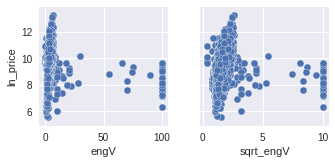

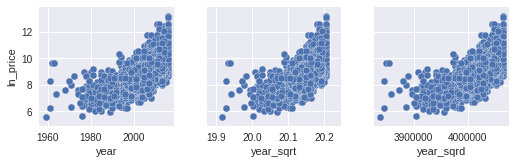

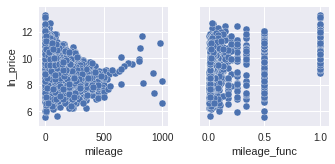

In [19]:
# I can pronounce some of the variance in engV by taking it's square root. 
df['sqrt_engV'] = np.sqrt(df.engV)

sns.pairplot(data=df, x_vars=['engV', 'sqrt_engV'], y_vars='ln_price')

## let's see if we can capture that curvature of year somehow. 
df['year_sqrd'] = df.year ** 2

## Actually, what we want to do is //tame// the curve, by //inverting// it. 
df['year_sqrt'] = 0.45 * np.sqrt(df.year)

sns.pairplot(data=df, x_vars=['year', 'year_sqrt', 'year_sqrd'], y_vars='ln_price');

# I wonder what I can do with mileage: 
df['mileage_func'] = np.divide(1, df.mileage+1)

sns.pairplot(data=df, x_vars=['mileage', 'mileage_func'], y_vars='ln_price');


### NOTES: 
- I think exploiting/pronouncing the variance of `engV` is a good idea. Since $\sqrt$ is a nonlinear function, i should be able to include both `engV` _and_ `sqrt_engV`
- niether taming nor pronouncing the curve on year went as well as i expected, but both sqrt and sqrd should be worth playing around with. 
- my recipricol function on mileage was interesting, it gave a new perspective to the diversity of this feature, which might make the result a little less noisy? 

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [12]:
# we'll drop ordinals. 

# Beta . [make, sqrt_engV, year, year_sqrd, mileage, mileage_func] = yhat

mymodfeats = ['make', 'engV', 'sqrt_engV', 'year', 'year_sqrt', 'mileage', 'mileage_func']

mod2 = LR(df[mymodfeats], df.ln_price)


rs21 = f"Intercept: {mod2['intercept']:.3}\n\nCoefficients: {mod2['coefficients']}\n\n"

rs22 = f"RMSE: {mod2['RMSE']:.3}\n\nCoefficient of Determination: {mod2['R2']:.3}\n"

print(rs21 + rs22)

Intercept: 3.28e+04

Coefficients: [-0.000691, -0.195, 2.17, 16.6, -3280.0, 0.000123, 0.281]

RMSE: 0.475

Coefficient of Determination: 0.76



## 2.5 How might we interpret the coefficient on "year" in this new regression model?

The same way as before, but it's share of overall impact on the model would be different. 

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient descent seeks to minimize a *cost function*, which is some metric you use to compare the model to data. 

For example, if you selected the **Sum of squared residuals**, which is based on **Euclidean distance**, your cost function would look  
```
def cost(theta, X=df[feature_list], y=df.price): 
  yhat = theta[0] + np.dot(X, theta[1:])
  return sum([(yhatk-yk)**2 for yhatk,yk in zip(yhat, y)])
```

and then you would find some algorithm to *minimize* this function. In other words, 

$ \theta_{hat} = argmin_{theta}(cost) $

python libraries like scipy and numpy have a few different ways you could attempt this minimization, though if you have less than 5 features the best bet would be to do your partial derivative's manually/longhand. 


## 3.2 What is the "Learning Rate" and what is its function?

Gradient descent **searches cost's domain** for answers to this `argmin` question. It does so by **iteratively taking steps in the most promising (i.e. *steepest*) direction**. A `learning_rate` is just the *size* of these steps. It is a _scalar_. 

By convention, the literature names it either $\gamma$ or $\alpha$, depending on where you're reading

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [13]:
X = sm.add_constant(df[mymodfeats])
# Use Statsmodels to run a regression

model = sm.OLS(df.ln_price, X).fit(cov_type = 'HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     2727.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:49:40   Log-Likelihood:                -5653.8
No. Observations:                8495   AIC:                         1.132e+04
Df Residuals:                    8487   BIC:                         1.138e+04
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.433e+04   2729.095     12.581   

In [0]:

# the report says that the standard errors are robust. 

# We definitely have colinearity. 

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [15]:
## /wiki/Variance_inflation_factor says "variance_inflation_factor function in statsmodels Python package" but I've been unable to locate it in docs. 



## sm.OLS doesn't seem to have a "get R2" method.

# i'm tired of messing with it, so I'm just gonna read 'em out manually. '

mymodfeats = ['make', 'engV', 'sqrt_engV', 'year', 
              'year_sqrt', 'mileage', 'mileage_func']

r2_results = {feat: x for feat,x in zip(mymodfeats, 
                                        [0.009, 0.003, 0.057, 0.485, 
                                         0.486, 0.158, 0.093]
                                       )
             }
# I manually filled the above list by calling `show(1)`, `show(2)` 7 times. 


def report_getter(feat): 
  X = sm.add_constant(df[feat])
  model = sm.OLS(df.ln_price, X).fit(cov_type='HC3')
  predictions = model.predict(X) 

  print_model = model.summary()
  return print_model

def show(i): 
  print(mymodfeats[i])
  print(report_getter(mymodfeats[i]))
  pass

#show(6)

r2_results

{'engV': 0.003,
 'make': 0.009,
 'mileage': 0.158,
 'mileage_func': 0.093,
 'sqrt_engV': 0.057,
 'year': 0.485,
 'year_sqrt': 0.486}

In [0]:
def VIFgetter(feat): 
  return np.divide(1, 1-r2_results[feat])

vifs = {feat: VIFgetter(feat) for feat in mymodfeats}

vif_mean = np.divide(sum(vifs.values()) ,len(vifs.keys()))

'''
this resource https://faculty.insead.edu/hubert-gatignon/documents/HG%20Notes-Identification%20of%20Multicollinearity-VIF%20and%20Conditioning%20Number_20140304.pdf 

says that vif_mean < 5 is a pretty drastic threshold for deciding whether or not we have collinearity---- 

However, this result disagrees ENTIRELY with what sm.OLS.summary() told me! 

According to the following assertion, vif_mean is too low for us to call the data collinear.

'''
assert vif_mean < 5 

# Meanwhile, our Cond. No. from sm.summary() is not only _above the threshold_ (~30, according to the lecture notes i found), 
# but it's **insanely** huge. 

# we should absolutely reduce out some collinearity. 

In [17]:
# I'm just gonna eyeball it and make some gut decisions to see if I can get rid of that collinearity. 

# It looks like 2 of my engineered features, sqrt(year) and my mileage_recipricol function, aren't performing very well. 
# let's get rid of them. 
X = sm.add_constant(df[mymodfeats].drop(['year_sqrt', 'mileage_func'], axis=1))
# Use Statsmodels to run a regression

model = sm.OLS(df.ln_price, X).fit(cov_type = 'HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1972.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:49:41   Log-Likelihood:                -6251.5
No. Observations:                8495   AIC:                         1.251e+04
Df Residuals:                    8489   BIC:                         1.256e+04
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -166.1351      3.217    -51.646      0.0

In [18]:
#colinearity still huge. 

# year_sqrt seems to be doing good
# and lets drop engV while keeping sqrt(engV)
X = sm.add_constant(df[mymodfeats].drop(['year_sqrt', 'mileage', 'engV', 'year'], axis=1))
# Use Statsmodels to run a regression

model = sm.OLS(df.ln_price, X).fit(cov_type = 'HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

# At this point, getting my Cond. No. under control is just about lowering the number of features, not about selecting the most problematic features to remove. 

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     342.0
Date:                Fri, 18 Jan 2019   Prob (F-statistic):          1.10e-209
Time:                        18:49:41   Log-Likelihood:                -11008.
No. Observations:                8495   AIC:                         2.202e+04
Df Residuals:                    8491   BIC:                         2.205e+04
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.6628      0.104     82.925   

### Conclusion: 

I was able to get Cond. No. down to the 2nd order of magnitude. I think that's about as low as I can get, and it doesn't alert `sm.OLS`'s collinearity alarms.

The sad part is that I'm basically massaging that number down by shrinking my total number of features. It would have been cool if I could identify the _exact_ source of the collinearity, but my VIF numbers didn't give me anything conclusive. 

According to [these lecture notes I found](https://faculty.insead.edu/hubert-gatignon/documents/HG%20Notes-Identification%20of%20Multicollinearity-VIF%20and%20Conditioning%20Number_20140304.pdf), `30` (i.e., 1 order of magnitude) is the threshold for "strong collinearity". The only way I can get it that low (`< 30`) is by predicting on two features. 

#### TLDR: collinearity vs. R2 seems like a zero sum tradeoff
- everything I could do to reduce Cond. No. also reduced R2. 

#### Wikipedia's procedure doesn't agree with the library
I implemented the judgment of magnitude of collinearity on my 7-feature model [as described](https://en.wikipedia.org/wiki/Variance_inflation_factor#Calculation_and_analysis) and would have reported that I have _nearly zero_ collinearity. At the exact same time, `sm.OLS` was reporting _ginormous_ collinearity. 

I'm assuming both 1. I made a mistake in my code somewhere, and 2. I don't understand what's going on at a deep enough level. 

